In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [59]:
def potenciaxdia(datos,):
    fechas = datos['Fecha'].unique()
    potxdia = []
    for i in range(len(fechas)):
        potxdia.append(datos[datos['Fecha']==fechas[i]].sum()['Potencia [kW]'] )
    df = {'Dia':fechas, 'Potencia dia [kW]':potxdia}
    df = pd.DataFrame(df)
    return df

In [60]:
archivos = glob.glob('*.csv')
archivos

['Abril 2020.csv',
 'Agosto 2020.csv',
 'Diciembre 2019.csv',
 'Diciembre 2020.csv',
 'Enero 2020.csv',
 'Febrero 2020.csv',
 'Julio 2020.csv',
 'Junio 2020.csv',
 'Marzo 2020.csv',
 'Mayo 2020.csv',
 'Noviembre 2019.csv',
 'Noviembre 2020.csv',
 'Octubre 2019.csv',
 'Octubre 2020.csv',
 'Septiembre 2020.csv']

In [61]:
i=0
for arch in archivos:
    df = pd.read_csv(arch)
    df = df.drop('Unnamed: 0',axis=1)
    df = df.dropna()
    
    name = arch.split('.')
    name = name[0].split(' ')
    
    globals()[name[0] + name[1]] = potenciaxdia(df)
    globals()[name[0] + name[1]].set_index('Dia',inplace = True)
    
    if i == 0:
        todo = globals()[name[0] + name[1]] # DataFrame donde se guardan los diferentes valores de energía por día.
    else:
        todo = pd.concat([todo , globals()[name[0] + name[1]]],axis = 0)
    i+=1

In [62]:
try:
    Abril2020.set_index('Dia',inplace = True)
except:
    pass
Abril2020

,Potencia dia [kW]
Dia,
1/04/2020,1060.49
2/04/2020,3340.75
3/04/2020,3420.27
4/04/2020,1812.48
5/04/2020,2724.37
6/04/2020,1915.31
7/04/2020,2234.32
8/04/2020,2008.61
9/04/2020,2526.14


Text(0, 0.5, 'Potencia diaria [kW]')

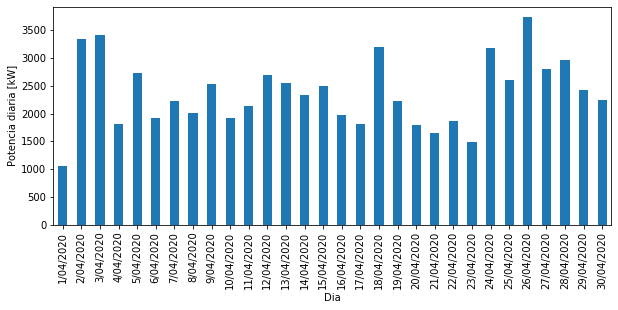

In [63]:
Abril2020['Potencia dia [kW]'].plot(kind = 'bar',figsize = (10,4))
plt.ylabel('Potencia diaria [kW]')

##

In [68]:
todo['Energia [kWh]'].max()

5804.480000000001